<a href="https://colab.research.google.com/github/Esteban-Prince/CPE-311/blob/main/CPE311_Esteban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

Answer the following exercises using Pandas on your local device:

1. Given the following data structures:

sales = [100,130,119,92,35]

customer_account = ['B100','J101','X102','P103','R104']

city = ['BOS','LA','NYC','SF','CHI']

    Create a DataFrame with the data above
    What is the name of the first column?: sales
    Sort the DataFrame by city in descending order (check the documentation for sort)
    Which customer is in the last row of the DataFrame?: Customer R104
    Reorder the columns with customer in the first column



In [ ]:
df = pd.DataFrame({'sales':[100,130,119,92,35], 'customer_account':['B100','J101','X102','P103','R104'], 'city':['BOS','LA','NYC','SF','CHI']})

df

,sales,customer_account,city
0,100,B100,BOS
1,130,J101,LA
2,119,X102,NYC
3,92,P103,SF
4,35,R104,CHI


In [ ]:
df.sort_values('city', inplace=True, ascending=False)

df

,sales,customer_account,city
3,92,P103,SF
2,119,X102,NYC
1,130,J101,LA
4,35,R104,CHI
0,100,B100,BOS


In [ ]:
df2 = pd.DataFrame(df, columns = ['customer_account','sales','city'])

df2


,customer_account,sales,city
3,P103,92,SF
2,X102,119,NYC
1,J101,130,LA
4,R104,35,CHI
0,B100,100,BOS


2. Load the Titanic Dataset

Download Titanic Dataset and answer the following questions:

    What was the average age of the survivors?: 28.343689655172415
    What was the combined survival rate of both children (age less than 18) and seniors (age greater than 60)?:
    Group by pClass and investigate average survival rate, age and fare
    Create a CSV with the names and ages of the survivors and another CSV file with the names and ages of the deceased.


In [ ]:
import pandas as pd
import numpy as np
import psycopg2 as ps

In [ ]:
data = pd.read_csv('Titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = data.Age[data.Survived==1].mean()

print('The average age of survivors are', df, 'years old.')

The average age of survivors are 28.343689655172415 years old.


In [ ]:
df = data.Survived[(data.Age<=18)].mean()
df1 =  data.Survived[(data.Age>=60)].mean()

total = (df + df1)/2

print('The combined survival rate of both children (age less than 18) and seniors (age greater than 60) are', total, 'percent.')

The combined survival rate of both children (age less than 18) and seniors (age greater than 60) are 0.3864139457664637 percent.


In [ ]:
df = data.groupby('Pclass')['Survived'].mean()
df2 = data.groupby('Pclass')['Age'].mean()
df3 = data.groupby('Pclass')['Fare'].mean()

df = pd.concat([df, df2, df3], axis=1)

df

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


In [ ]:
#SURVIVED
ndata = data[(data.Survived==1)]
df1 = ndata.iloc[:,3]
df2 = ndata.iloc[:,5]
df3 = ndata.iloc[:,1]

dfnew = pd.concat([df1,df2,df3], axis = 1)

dfnew.to_csv('Survived.csv')

In [109]:
#DECEASED
ndata = data[(data.Survived==0)]
df1 = ndata.iloc[:,3]
df2 = ndata.iloc[:,5]
df3 = ndata.iloc[:,1]

dfnew = pd.concat([df1,df2,df3], axis = 1)

dfnew.to_csv('Deceased.csv')

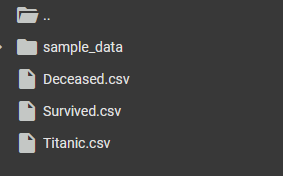